In [2]:
import pandas as pd
import datetime as dt
from pandas.core.frame import DataFrame
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup
import watermark
from collections import namedtuple
from adjustText import adjust_text
from pathlib import Path

print(
    watermark.watermark(iversions=True, python=True, machine=True, globals_=globals())
)

Python implementation: CPython
Python version       : 3.12.7
IPython version      : 8.28.0

Compiler    : GCC 14.2.1 20241116
OS          : Linux
Release     : 6.12.3-gentoo
Machine     : x86_64
Processor   : AMD Ryzen 9 5950X 16-Core Processor
CPU cores   : 32
Architecture: 64bit

matplotlib: 3.9.3
seaborn   : 0.13.2
numpy     : 2.0.2
adjustText: 1.3.0
bs4       : 4.12.3
pandas    : 2.2.3
requests  : 2.32.3
watermark : 2.5.0



In [3]:
!wget -O data/alldata.csv https://salsa.debian.org/benchmarksgame-team/benchmarksgame/-/raw/master/public/data/alldata.csv

--2024-12-09 14:22:47--  https://salsa.debian.org/benchmarksgame-team/benchmarksgame/-/raw/master/public/data/alldata.csv
Resolving salsa.debian.org... 209.87.16.44, 2607:f8f0:614:1::1274:44
Connecting to salsa.debian.org|209.87.16.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 784274 (766K) [text/plain]
Saving to: ‘data/alldata.csv’

data/alldata.csv    100%[===================>] 765.89K   847KB/s    in 0.9s    

2024-12-09 14:22:49 (847 KB/s) - ‘data/alldata.csv’ saved [784274/784274]



In [4]:
lang_dict = {
    # "C": "C/C++",
    # "C++": "C/C++",
    "Delphi/Object Pascal": "Delphi/Pascal",
    "MATLAB": "Matlab",
    "Cobol": "COBOL",
    # "VBA": "Visual Basic",
    "Powershell": "PowerShell",
    "VBScript": "VBA/VBS",
    "VBA": "VBA/VBS",
    "ABAP": "Abap",
}

In [5]:
tiobe_url = "https://www.tiobe.com/tiobe-index/"


def get_tiobe_rank(url: str) -> DataFrame:
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        # Найти таблицу с индексом TIOBE по ее структуре или каким-то уникальным признакам
        # Это пример и может потребоваться адаптация
        table_class = "table table-striped table-top20"
        table = soup.find("table", {"class": table_class})
        rows = table.find_all("tr")

        ratings = []
        for row in rows[1:]:  # Пропустить заголовок таблицы
            # print(row)
            cols = row.find_all("td")
            # Извлечь необходимые данные из столбцов
            if len(cols) > 3:
                rank = int(cols[0].text.strip())
                lang = cols[4].text.strip()
                share = float(cols[5].text.replace("%", "").strip())
                trend = float(cols[6].text.replace("%", "").strip())
                ratings.append(
                    {"rank": rank, "lang": lang, "share": share, "trend": trend}
                )

        table = soup.find("table", {"id": "otherPL"})
        rows = table.find_all("tr")

        for row in rows[1:]:  # Пропустить заголовок таблицы
            # print(row)
            cols = row.find_all("td")
            # Извлечь необходимые данные из столбцов
            if len(cols) > 2:
                rank = int(cols[0].text.strip())
                lang = str(cols[1].text.strip())
                share = float(cols[2].text.replace("%", "").strip())
                trend = None
                ratings.append(
                    {"rank": rank, "lang": lang, "share": share, "trend": trend}
                )

    else:
        print("Не удалось получить данные с сайта TIOBE.")

    tiobe_rank = pd.DataFrame(ratings)
    tiobe_rank = tiobe_rank.replace(lang_dict).groupby("lang").sum().reset_index()
    return tiobe_rank


tiobe_rank = get_tiobe_rank(tiobe_url)
tiobe_rank.set_index("lang", inplace=True)
tiobe_rank

,rank,share,trend
lang,,,
(Visual) FoxPro,29,0.57,0.00
Abap,44,0.19,0.00
Ada,24,0.72,0.00
Assembly language,17,1.04,-0.07
Awk,45,0.17,0.00
Bash,38,0.33,0.00
C,4,9.10,-2.34
C#,5,4.87,-2.43
C++,2,10.82,0.81


In [6]:
def get_pypl_rank(url: str) -> DataFrame:
    # URL индекса популярности PYPL

    # Отправляем HTTP запрос и получаем результат
    response = requests.get(url)
    response.raise_for_status()  # Вызовет исключение, если запрос не успешен

    start_word = "<!-- begin section All-->"
    end_word = "<!-- end section All-->"
    start_idx = response.text.find(start_word) + len(start_word)
    end_idx = response.text.find(end_word)
    # Парсим HTML с помощью BeautifulSoup
    soup = BeautifulSoup(f"<tr>{response.content[start_idx:end_idx]}", "html.parser")
    rows = soup.find_all("tr")
    # Извлекаем данные о языках программирования и их доле
    ratings = []
    for row in rows:
        columns = row.find_all("td")
        rank = int(columns[0].text.strip())
        lang = str(columns[2].text.strip())
        share = float(columns[3].text.replace("%", "").strip())
        trend = float(columns[4].text.replace("%", "").strip())
        ratings.append({"rank": rank, "lang": lang, "share": share, "trend": trend})
    df = pd.DataFrame(ratings)
    df.replace(lang_dict, inplace=True)
    return df


pypl_url = "https://pypl.github.io/PYPL.html"
# Получаем и выводим рейтинг языков программирования
pypl_rank = get_pypl_rank(pypl_url)
pypl_rank.set_index("lang", inplace=True)
pypl_rank

,rank,share,trend
lang,,,
Python,1,29.71,1.5
Java,2,15.43,-0.3
JavaScript,3,7.99,-0.9
C/C++,4,7.06,0.3
C#,5,6.42,-0.2
R,6,4.67,0.1
PHP,7,3.97,-0.6
TypeScript,8,2.87,-0.0
Rust,9,2.66,0.5


In [7]:
# Рейтинг Pylp не отличает C от C++ поэтому высчитываем их рейтинг на основе рейтинга Tiobe
lang_ratio = tiobe_rank.loc["C++"] / (tiobe_rank.loc["C"] + tiobe_rank.loc["C++"])
lang_ratio

rank     0.333333
share    0.543173
trend   -0.529412
dtype: float64

In [8]:
for col in ("share", "trend"):
    pypl_rank.loc["C++", col] = pypl_rank.loc["C/C++", col] * lang_ratio[col]
    pypl_rank.loc["C", col] = pypl_rank.loc["C/C++", col] * (1 - lang_ratio[col])

pypl_rank

,rank,share,trend
lang,,,
Python,1.0,29.710000,1.500000
Java,2.0,15.430000,-0.300000
JavaScript,3.0,7.990000,-0.900000
C/C++,4.0,7.060000,0.300000
C#,5.0,6.420000,-0.200000
R,6.0,4.670000,0.100000
PHP,7.0,3.970000,-0.600000
TypeScript,8.0,2.870000,-0.000000
Rust,9.0,2.660000,0.500000


In [9]:
rank_all = pd.merge(
    tiobe_rank, pypl_rank, on="lang", how="outer", suffixes=("_tiobe", "_pypl")
)
rank_all["trend_norm"] = np.sqrt(
    rank_all.fillna(0)["trend_tiobe"] ** 2 + rank_all.fillna(0)["trend_pypl"] ** 2
)

rank_all["share_norm"] = np.sqrt(
    rank_all.fillna(0)["share_tiobe"] ** 2 + rank_all.fillna(0)["share_pypl"] ** 2
)
rank_all["norm_ratio"] = rank_all["trend_norm"] / rank_all["share_norm"]
rank_all

,rank_tiobe,share_tiobe,trend_tiobe,rank_pypl,share_pypl,trend_pypl,trend_norm,share_norm,norm_ratio
lang,,,,,,,,,
(Visual) FoxPro,29.0,0.57,0.00,NaN,NaN,NaN,0.000000,0.570000,0.000000
Abap,44.0,0.19,0.00,21.0,0.640000,0.100000,0.100000,0.667608,0.149789
Ada,24.0,0.72,0.00,15.0,1.130000,0.100000,0.100000,1.339888,0.074633
Assembly language,17.0,1.04,-0.07,NaN,NaN,NaN,0.070000,1.040000,0.067308
Awk,45.0,0.17,0.00,NaN,NaN,NaN,0.000000,0.170000,0.000000
Bash,38.0,0.33,0.00,NaN,NaN,NaN,0.000000,0.330000,0.000000
C,4.0,9.10,-2.34,NaN,3.225201,0.458824,2.384558,9.654632,0.246986
C#,5.0,4.87,-2.43,5.0,6.420000,-0.200000,2.438217,8.058120,0.302579
C++,2.0,10.82,0.81,NaN,3.834799,-0.158824,0.825424,11.479464,0.071904


In [10]:
short_rank_all = rank_all.dropna(subset=["share_tiobe", "share_pypl"], how="any")
short_rank_all.reset_index(inplace=True)
short_rank_all

,lang,rank_tiobe,share_tiobe,trend_tiobe,rank_pypl,share_pypl,trend_pypl,trend_norm,share_norm,norm_ratio
0,Abap,44.0,0.19,0.00,21.0,0.640000,0.100000,0.100000,0.667608,0.149789
1,Ada,24.0,0.72,0.00,15.0,1.130000,0.100000,0.100000,1.339888,0.074633
2,C,4.0,9.10,-2.34,NaN,3.225201,0.458824,2.384558,9.654632,0.246986
3,C#,5.0,4.87,-2.43,5.0,6.420000,-0.200000,2.438217,8.058120,0.302579
4,C++,2.0,10.82,0.81,NaN,3.834799,-0.158824,0.825424,11.479464,0.071904
5,COBOL,19.0,0.98,0.30,26.0,0.150000,-0.100000,0.316228,0.991413,0.318967
6,Dart,33.0,0.47,0.00,19.0,0.930000,-0.100000,0.100000,1.042017,0.095968
7,Delphi/Pascal,11.0,1.44,0.52,29.0,0.050000,-0.100000,0.529528,1.440868,0.367506
8,Go,7.0,2.17,1.14,12.0,2.200000,0.200000,1.157411,3.090129,0.374551
9,Haskell,30.0,0.54,0.00,27.0,0.120000,-0.200000,0.200000,0.553173,0.361551


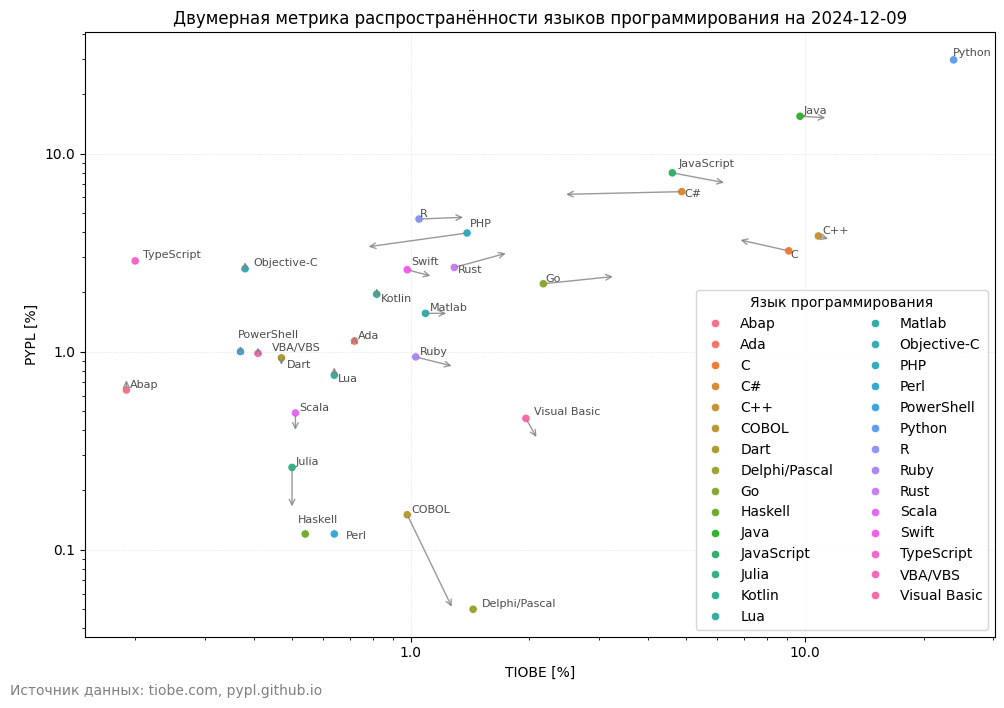

In [11]:
def norm(a, b) -> float:
    return (a**2 + b**2) ** (1 / 2)


fig = plt.figure(figsize=(10, 7))
ax = sns.scatterplot(data=short_rank_all, x="share_tiobe", y="share_pypl", hue="lang")
plt.xscale("log")
plt.yscale("log")
ax.set(
    xlabel="TIOBE [%]",
    ylabel="PYPL [%]",
    title=f"Двумерная метрика распространённости языков программирования на {
        dt.date.today()}",
    # xlim=(0, 50),
    # ylim=(0, 50),
)
ax.grid(ls=":", lw=0.5, alpha=0.5)
texts = []
for x in short_rank_all.itertuples():
    texts.append(ax.text(x.share_tiobe, x.share_pypl, x.lang, fontsize=8, alpha=0.7))
    if (x.trend_tiobe is not None) and (x.trend_pypl is not None):
        ax.annotate(
            "",
            xy=(x.trend_tiobe + x.share_tiobe, x.trend_pypl + x.share_pypl),
            xytext=(x.share_tiobe, x.share_pypl),
            arrowprops=dict(arrowstyle="->", lw=1, alpha=0.8, color="grey"),
        )
adjust_text(texts)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.legend(loc="lower right", ncol=2, title="Язык программирования")
fig.tight_layout()
fig.text(0, 0, f"Источник данных: tiobe.com, pypl.github.io", color="grey")
fig.savefig(Path("output.png"), dpi=300)

## Расчёт с учётом оценки производительности

In [12]:
alias_bench = {
    "chapel": "Chapel",
    "clang": "C/C++",
    "csharpaot": "C#",
    "csharpcore": "C#",
    "dartexe": "Dart",
    "dartjit": "Dart",
    "erlang": "Erland",
    "fpascal": "Free Pascal",
    "fsharpcore": "F#",
    "gcc": "C/C++",
    "ghc": "Haskell",
    "gnat": "Ada",
    "go": "Go",
    "gpp": "C/C++",
    "graalvm": "Graal",
    "icx": "C/C++",
    "ifc": "Fortran",
    "ifx": "Fortran",
    "java": "Java",
    "javaxint": "Java",
    "julia": "Julia",
    "lua": "Lua",
    "micropython": "Python",
    "mri": "Ruby",
    "node": "JavaScript",
    "ocaml": "OCaml",
    "openj9": "Java",
    "perl": "Perl",
    "pharo": "Smalltalk",
    "php": "PHP",
    "python3": "Python",
    "racket": "Racket",
    "ruby": "Ruby",
    "rust": "Rust",
    "sbcl": "Lisp",
    "swift": "Swift",
    "toit": "Toit",
    "vw": "",
}

In [13]:
bench_game = pd.read_csv(Path("data/alldata.csv"))
bench_game = bench_game[bench_game["status"] >= 0]
bench_game.drop(columns=["id", "n"], inplace=True)
bench_game

,name,lang,size(B),cpu(s),mem(KB),status,load,elapsed(s),busy(s),started(s)
0,binarytrees,sbcl,595,0.035,22528,0,0% 3% 2% 0%,0.803,0.051,0.000
1,binarytrees,sbcl,595,0.095,97792,0,10% 100% 0% 0%,0.095,0.105,0.000
2,binarytrees,sbcl,595,9.629,643540,0,100% 0% 0% 0%,9.632,9.777,0.000
3,binarytrees,sbcl,595,9.636,643552,0,0% 0% 100% 0%,9.640,9.765,0.000
4,binarytrees,sbcl,595,9.606,643680,0,0% 100% 0% 0%,9.608,9.646,0.000
...,...,...,...,...,...,...,...,...,...,...
10145,toosimple,javaxint,295,3.310,37660,0,99% 0% 0% 1%,3.319,3.388,3.271
10146,toosimple,javaxint,295,323.605,37792,0,0% 0% 100% 0%,323.491,324.462,323.444
10147,toosimple,python3,190,0.189,19316,0,33% 0% 3% 0%,0.587,0.215,0.172
10148,toosimple,python3,190,11.682,19316,0,43% 57% 0% 0%,11.684,11.801,11.663


In [14]:
a = bench_game.groupby(["lang", "name"]).min(numeric_only=True).groupby("lang").median()
a["lang_name"] = a.index.map(alias_bench)
a

,size(B),cpu(s),mem(KB),status,elapsed(s),busy(s),started(s),lang_name
lang,,,,,,,,
chapel,526.0,0.0600,19436.0,0.0,0.2665,0.0650,0.0,Chapel
clang,607.0,0.0330,19772.0,0.0,0.0350,0.0380,0.0,C/C++
csharpaot,590.0,0.0400,19620.0,0.0,0.1485,0.0500,0.0,C#
csharpcore,590.0,0.1510,28936.0,0.0,0.3575,0.1520,0.0,C#
dartexe,508.0,0.0830,19712.0,0.0,0.1320,0.0840,0.0,Dart
dartjit,508.0,1.4460,158684.0,0.0,1.1330,1.5070,0.0,Dart
erlang,871.0,1.2460,55598.0,0.0,1.5695,1.2980,0.0,Erland
fpascal,959.0,0.0660,19672.0,0.0,0.0750,0.0700,0.0,Free Pascal
fsharpcore,725.5,0.2860,34964.0,0.0,0.4230,0.2960,0.0,F#


In [15]:
a = a.groupby("lang_name").median().sort_values(by="elapsed(s)", ascending=True)
a

,size(B),cpu(s),mem(KB),status,elapsed(s),busy(s),started(s)
lang_name,,,,,,,
C/C++,607.0,0.0305,19703.0,0.0,0.0330,0.03625,0.0
Rust,883.5,0.0225,19804.0,0.0,0.0385,0.02350,0.0
Go,554.5,0.0655,19660.0,0.0,0.0445,0.07200,0.0
Fortran,780.0,0.0440,19650.0,0.0,0.0605,0.04250,0.0
OCaml,473.0,0.0595,19676.0,0.0,0.0710,0.07650,0.0
Free Pascal,959.0,0.0660,19672.0,0.0,0.0750,0.07000,0.0
Lisp,905.5,0.1135,19680.0,0.0,0.2050,0.12950,0.0
Haskell,801.5,0.0525,19808.0,0.0,0.2160,0.05450,0.0
C#,590.0,0.0955,24278.0,0.0,0.2530,0.10100,0.0


In [16]:
a.loc["C"] = a.loc["C/C++"]
a.loc["C++"] = a.loc["C/C++"]
a.sort_values(by="cpu(s)", ascending=True)

,size(B),cpu(s),mem(KB),status,elapsed(s),busy(s),started(s)
lang_name,,,,,,,
Rust,883.5,0.0225,19804.0,0.0,0.0385,0.02350,0.0
C/C++,607.0,0.0305,19703.0,0.0,0.0330,0.03625,0.0
C++,607.0,0.0305,19703.0,0.0,0.0330,0.03625,0.0
C,607.0,0.0305,19703.0,0.0,0.0330,0.03625,0.0
Fortran,780.0,0.0440,19650.0,0.0,0.0605,0.04250,0.0
Haskell,801.5,0.0525,19808.0,0.0,0.2160,0.05450,0.0
OCaml,473.0,0.0595,19676.0,0.0,0.0710,0.07650,0.0
Chapel,526.0,0.0600,19436.0,0.0,0.2665,0.06500,0.0
Go,554.5,0.0655,19660.0,0.0,0.0445,0.07200,0.0


In [17]:
b = short_rank_all.join(a["elapsed(s)"], on="lang")
b["slower"] = b["elapsed(s)"] / (b["elapsed(s)"].min())
for col in ["share_tiobe", "share_pypl", "trend_tiobe", "trend_pypl"]:
    b[col] = b[col] / b["slower"]
b.dropna(subset=["share_tiobe", "share_pypl"], how="any", inplace=True)
b

,lang,rank_tiobe,share_tiobe,trend_tiobe,rank_pypl,share_pypl,trend_pypl,trend_norm,share_norm,norm_ratio,elapsed(s),slower
1,Ada,24.0,0.089156,0.000000,15.0,0.139925,0.012383,0.100000,1.339888,0.074633,0.2665,8.075758
2,C,4.0,9.100000,-2.340000,NaN,3.225201,0.458824,2.384558,9.654632,0.246986,0.0330,1.000000
3,C#,5.0,0.635217,-0.316957,5.0,0.837391,-0.026087,2.438217,8.058120,0.302579,0.2530,7.666667
4,C++,2.0,10.820000,0.810000,NaN,3.834799,-0.158824,0.825424,11.479464,0.071904,0.0330,1.000000
6,Dart,33.0,0.024522,0.000000,19.0,0.048522,-0.005217,0.100000,1.042017,0.095968,0.6325,19.166667
8,Go,7.0,1.609213,0.845393,12.0,1.631461,0.148315,1.157411,3.090129,0.374551,0.0445,1.348485
9,Haskell,30.0,0.082500,0.000000,27.0,0.018333,-0.030556,0.200000,0.553173,0.361551,0.2160,6.545455
10,Java,3.0,0.496533,0.088375,2.0,0.788220,-0.015325,1.755819,18.236318,0.096281,0.6460,19.575758
11,JavaScript,6.0,0.298880,0.111513,3.0,0.518016,-0.058350,1.941237,9.224543,0.210443,0.5090,15.424242
12,Julia,32.0,0.025385,0.000000,24.0,0.013200,-0.005077,0.100000,0.563560,0.177443,0.6500,19.696970


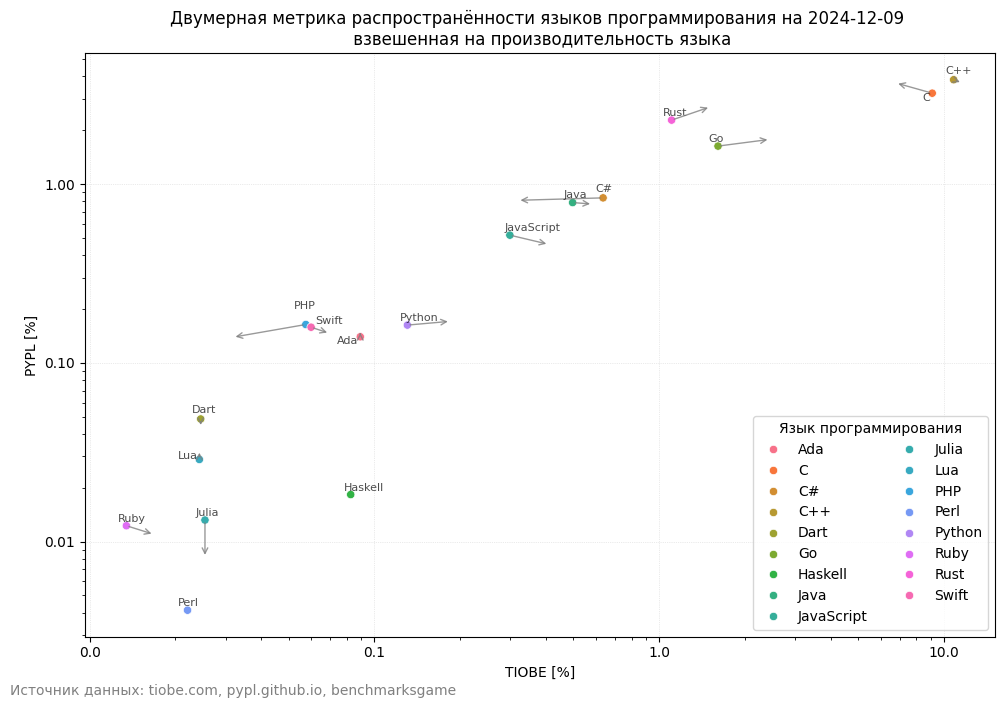

In [18]:
fig = plt.figure(figsize=(10, 7))
ax = sns.scatterplot(data=b, x="share_tiobe", y="share_pypl", hue="lang")
plt.xscale("log")
plt.yscale("log")
ax.set(
    xlabel="TIOBE [%]",
    ylabel="PYPL [%]",
    title=f"Двумерная метрика распространённости языков программирования на {
        dt.date.today()} \n взвешенная на производительность языка",
    # xlim=(0, 50),
    # ylim=(0, 50),
)
ax.grid(ls=":", lw=0.5, alpha=0.5)
texts = []
obj = []
xx = []
yy = []
for x in b.itertuples():
    texts.append(
        ax.text(x.share_tiobe, x.share_pypl, x.lang, fontsize=8, alpha=0.7, ha="center")
    )
    if (
        (x.trend_tiobe is not None)
        and (x.trend_pypl is not None)
        and x.trend_norm > 0.0
    ):
        xx.append(x.trend_tiobe + x.share_tiobe)
        yy.append(x.trend_pypl + x.share_pypl)
        ax.annotate(
            "",
            xy=(x.trend_tiobe + x.share_tiobe, x.trend_pypl + x.share_pypl),
            xytext=(x.share_tiobe, x.share_pypl),
            arrowprops=dict(arrowstyle="->", lw=1, alpha=0.8, color="grey"),
        )
adjust_text(texts, x=xx, y=yy, ax=ax)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.legend(loc="lower right", ncol=2, title="Язык программирования")
fig.tight_layout()
fig.text(
    0, 0, f"Источник данных: tiobe.com, pypl.github.io, benchmarksgame", color="grey"
)
fig.savefig(Path("perf_rank.png"), dpi=300)